In [1]:
import pandas as pd
from extract import Count, SocialETL, SocialDB
from rich import print

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.utils import np_random_state

In [3]:
import seaborn as sns
import numpy as np
import math

In [4]:
m = SocialDB(100)

In [5]:
m.df

,class
id,
399472,prorus
840590,proukr
448008,prorus
260713,prorus
551379,prorus
...,...
216554,prorus
634937,prorus
851519,pax


In [6]:
m.edges

[{'id': 853706, 'from': 718154, 'to': 260713},
 {'id': 158180, 'from': 399472, 'to': 930830},
 {'id': 953375, 'from': 855286, 'to': 497982},
 {'id': 287812, 'from': 952041, 'to': 887185},
 {'id': 320774, 'from': 616443, 'to': 286947},
 {'id': 545623, 'from': 496655, 'to': 851519},
 {'id': 888203, 'from': 957432, 'to': 602563},
 {'id': 904646, 'from': 480271, 'to': 851519},
 {'id': 424124, 'from': 451979, 'to': 934590},
 {'id': 213176, 'from': 551379, 'to': 216554},
 {'id': 949677, 'from': 681661, 'to': 726776},
 {'id': 619259, 'from': 797486, 'to': 718154},
 {'id': 270158, 'from': 431473, 'to': 528201},
 {'id': 307056, 'from': 963193, 'to': 297206},
 {'id': 733222, 'from': 606019, 'to': 496655},
 {'id': 500615, 'from': 703486, 'to': 528074},
 {'id': 618628, 'from': 149934, 'to': 437868},
 {'id': 284856, 'from': 878249, 'to': 382075},
 {'id': 870007, 'from': 878249, 'to': 930830},
 {'id': 808362, 'from': 930830, 'to': 584605},
 {'id': 961537, 'from': 703486, 'to': 998974},
 {'id': 94342

In [38]:
g= list(m.df.index)
G = nx.Graph()
G.add_nodes_from(g, stand=m.df["class"])


In [8]:
edges = [(x["from"], x["to"]) for x in m.edges]
print(edges)

[
    (718154, 260713),
    (399472, 930830),
    (855286, 497982),
    (952041, 887185),
    (616443, 286947),
    (496655, 851519),
    (957432, 602563),
    (480271, 851519),
    (451979, 934590),
    (551379, 216554),
    (681661, 726776),
    (797486, 718154),
    (431473, 528201),
    (963193, 297206),
    (606019, 496655),
    (703486, 528074),
    (149934, 437868),
    (878249, 382075),
    (878249, 930830),
    (930830, 584605),
    (703486, 998974),
    (556287, 606019),
    (882478, 469609),
    (483998, 998974),
    (556287, 149934),
    (851519, 216554),
    (951207, 131969),
    (246826, 634937),
    (529291, 983604),
    (616443, 448008),
    (930830, 962730),
    (176848, 653761),
    (690171, 374293),
    (216554, 952041),
    (402174, 469609),
    (936461, 166939),
    (206525, 551379),
    (491985, 149934),
    (567647, 928507),
    (963193, 486374),
    (606513, 299514),
    (963193, 797486),
    (377480, 567647),
    (681661, 698441),
    (698441, 934590),
    (698441, 998654),
    (292436, 260713),
    (437868, 292436),
    (698441, 903322),
    (373998, 108788),
    (616443, 559907),
    (910506, 584605),
    (292436, 469609),
    (698441, 600475),
    (496655, 887185),
    (726776, 615961),
    (529291, 929555),
    (426609, 602563),
    (402174, 741681),
    (957432, 851519),
    (108788, 930905),
    (882478, 606513),
    (166939, 602563),
    (382075, 878249),
    (957432, 718154),
    (903322, 936461),
    (528201, 292436),
    (216772, 983604),
    (377480, 480271),
    (377480, 855286),
    (619566, 451979),
    (259453, 741681),
    (983604, 259453),
    (377480, 117704),
    (448008, 998654),
    (486374, 206525),
    (374293, 426609),
    (286947, 390838),
    (453546, 373998),
    (606019, 726776),
    (934590, 374293),
    (483998, 878249),
    (827519, 166939),
    (437868, 450459),
    (399896, 983604),
    (962730, 129986),
    (108788, 602563),
    (390838, 903322),
    (451979, 634937),
    (178808, 399472),
    (559907, 483998),
    (129986, 703486),
    (150501, 887185),
    (882478, 216772),
    (480271, 529291),
    (615961, 690171),
    (377480, 851519),
    (377480, 469609),
    (983604, 483998),
    (619566, 149934),
    (602563, 963193),
    (952041, 606019),
    (246826, 681661),
    (606513, 957432),
    (299514, 260713),
    (903322, 496655),
    (169407, 934590),
    (390838, 216772),
    (166939, 373998),
    (496655, 606019),
    (390838, 929555),
    (373998, 951207),
    (840590, 374293),
    (260713, 150501),
    (851519, 855286),
    (108788, 600475),
    (726776, 491985),
    (882478, 930830),
    (963193, 399896),
    (206525, 178808),
    (439754, 166939),
    (292436, 448008),
    (166939, 286947),
    (936461, 606513),
    (528201, 957432),
    (297206, 150501),
    (437868, 528201),
    (420343, 448008),
    (616443, 216554),
    (216772, 871364),
    (930830, 903322),
    (286947, 216554),
    (426855, 556287),
    (698441, 903322),
    (690171, 108788),
    (480271, 602563),
    (934590, 216772),
    (297206, 399896),
    (420343, 529291),
    (497982, 373998),
    (703486, 951207),
    (653761, 962730),
    (439754, 169407),
    (450459, 551379),
    (930905, 216554),
    (496655, 616443),
    (399896, 332264),
    (402174, 910506),
    (690171, 426609),
    (117704, 382075),
    (615961, 998654),
    (528201, 439754),
    (131969, 809371),
    (453546, 726776),
    (129986, 809371),
    (299514, 480271),
    (855286, 426609),
    (681661, 486374),
    (887185, 983604),
    (703486, 878249),
    (840272, 797486),
    (178808, 399896),
    (216772, 871364),
    (260713, 448008),
    (259453, 176848),
    (726776, 962730),
    (390838, 297206),
    (332264, 259453),
    (108788, 292436),
    (373998, 718154),
    (382075, 882478),
    (653761, 246826),
    (619566, 930830),
    (206525, 528201),
    (606019, 602563),
    (827519, 771470),
    (705796, 681661),
    (606019, 286947),
    (176848, 426855),
    (491985, 718154),
    (797486, 117704),
    (698441, 882

In [9]:
G.add_edges_from(edges)

In [10]:
G.number_of_edges()

292

In [11]:
G.number_of_nodes()

100

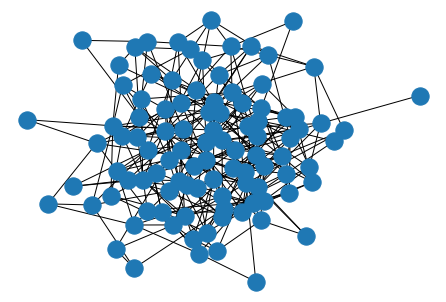

In [12]:
nx.draw(G)

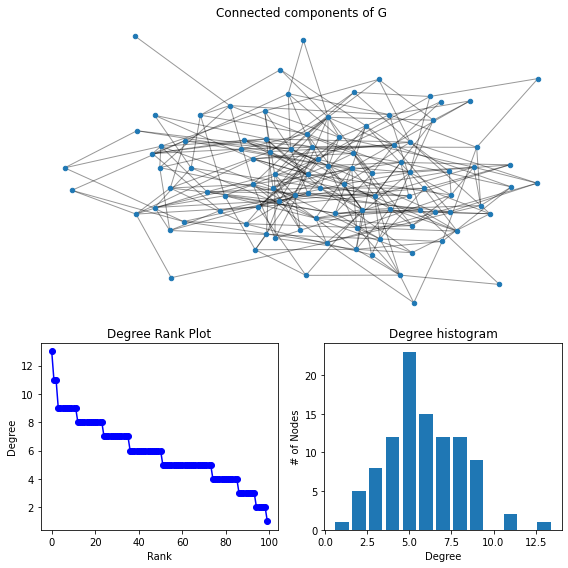

In [24]:
#degree plotting

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

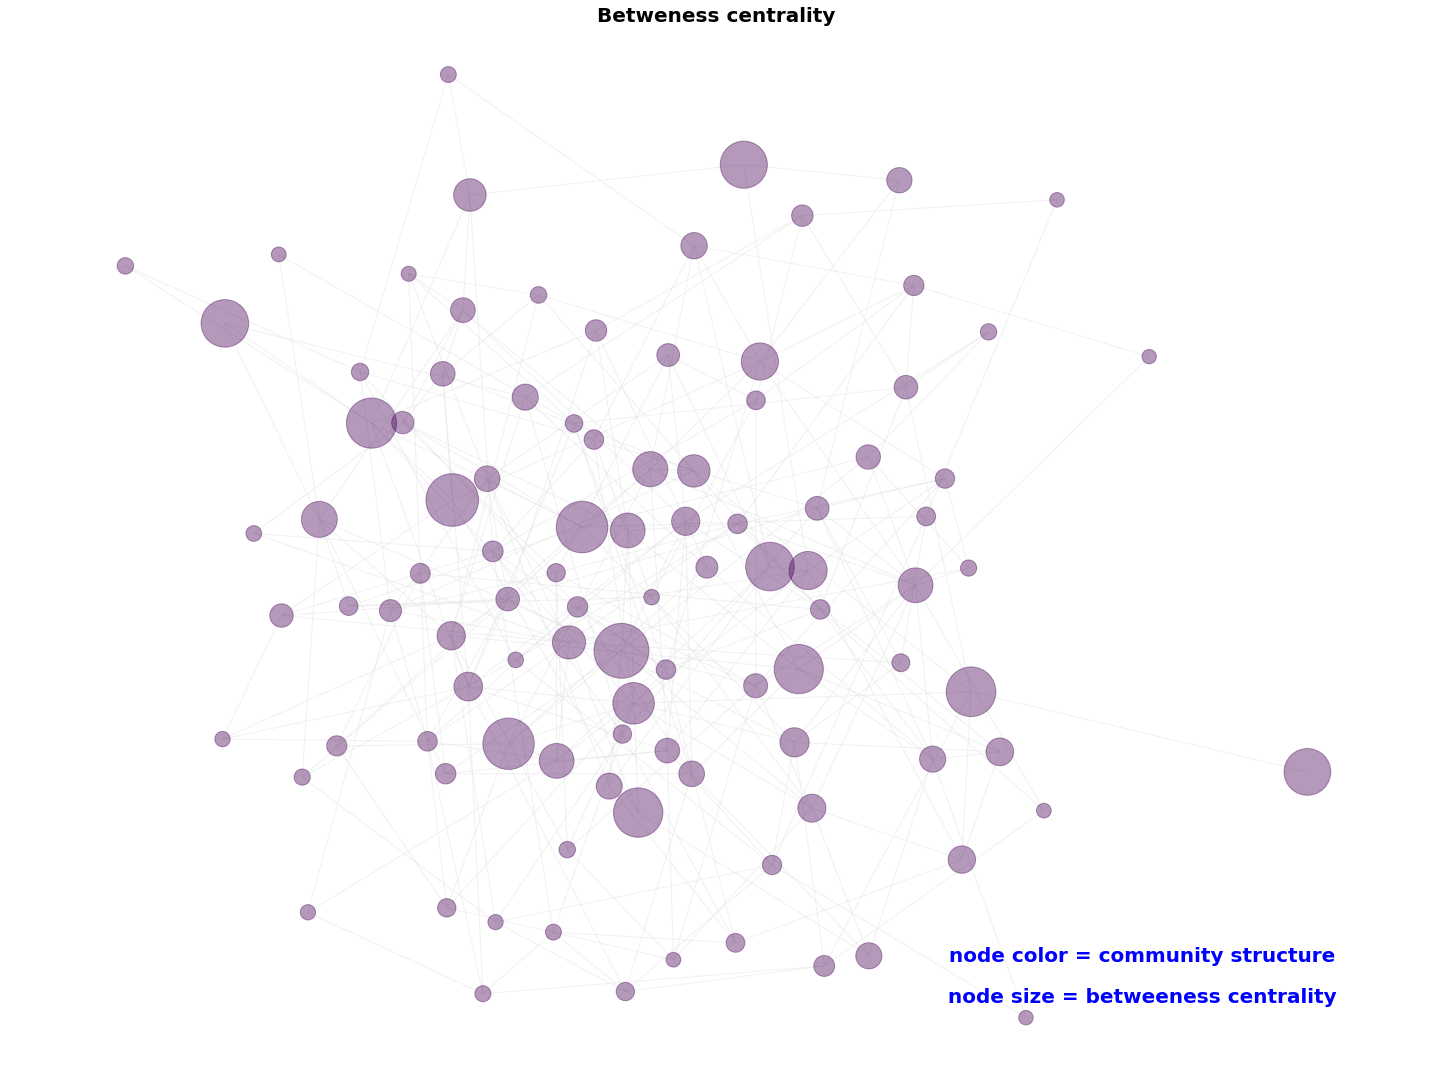

In [36]:
# largest connected component
components = nx.connected_components(G)
largest_component = max(components, key=len)
H = G.subgraph(largest_component)

# compute centrality
centrality = nx.betweenness_centrality(H, k=10, endpoints=True)

# compute community structure
lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H, k=0.15, seed=4572321)
node_color = [community_index[n] for n in H]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(
    H,
    pos=pos,
    with_labels=False,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.4,
)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Betweness centrality", font)
# Change font color for legend
font["color"] = "b"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

In [25]:
def density(G):
    n = G.number_of_nodes()
    m = G.number_of_edges()
    if m == 0 or n <= 1:
        return 0
    d = m / (n * (n - 1))
    if not G.is_directed():
        d *= 2
    return d


In [26]:
nx.average_neighbor_degree(G)

{399472: 7.333333333333333,
 840590: 9.5,
 448008: 6.857142857142857,
 260713: 7.8,
 551379: 5.75,
 496655: 6.777777777777778,
 382075: 5.2,
 169407: 6.666666666666667,
 998974: 5.6,
 131969: 6.8,
 292436: 7.222222222222222,
 741681: 7.0,
 963193: 6.857142857142857,
 827519: 5.5,
 929555: 6.857142857142857,
 567647: 5.0,
 928507: 6.666666666666667,
 882478: 6.714285714285714,
 178808: 6.333333333333333,
 129986: 6.2,
 420343: 7.0,
 286947: 7.0,
 297206: 7.2,
 930905: 8.0,
 486374: 7.857142857142857,
 619566: 6.166666666666667,
 936461: 7.0,
 453546: 7.0,
 809371: 7.25,
 399896: 6.833333333333333,
 855286: 5.833333333333333,
 451979: 4.8,
 616443: 6.714285714285714,
 332264: 6.4,
 934590: 5.666666666666667,
 698441: 6.875,
 602563: 8.555555555555555,
 431473: 6.75,
 497982: 6.8,
 556287: 8.0,
 138823: 7.8,
 771470: 4.5,
 439754: 7.6,
 450459: 6.75,
 878249: 6.6,
 426855: 5.375,
 903322: 6.285714285714286,
 176848: 7.0,
 681661: 6.375,
 166939: 6.111111111111111,
 887185: 8.5,
 426609: 6

In [27]:
print('Density of Real network:', density(G))

Density of Real network: 0.05898989898989899

In [28]:
print('Average Clustering coefficient is:', nx.average_clustering(G))

Average Clustering coefficient is: 0.036565989565989575

In [29]:
r = nx.degree_assortativity_coefficient(G)
>>> print(f"{r:3.1f}")

0.0

In [30]:
nx.average_degree_connectivity(G)

{3: 6.708333333333333,
 2: 7.1,
 7: 6.630952380952381,
 5: 6.495652173913044,
 4: 6.895833333333333,
 9: 7.0,
 6: 6.344444444444444,
 8: 6.635416666666667,
 11: 7.2727272727272725,
 13: 6.769230769230769,
 1: 6.0}

In [31]:
list(G.degree)

[(399472, 3),
 (840590, 2),
 (448008, 7),
 (260713, 5),
 (551379, 4),
 (496655, 9),
 (382075, 5),
 (169407, 3),
 (998974, 5),
 (131969, 5),
 (292436, 9),
 (741681, 2),
 (963193, 7),
 (827519, 4),
 (929555, 7),
 (567647, 3),
 (928507, 3),
 (882478, 7),
 (178808, 6),
 (129986, 5),
 (420343, 5),
 (286947, 7),
 (297206, 5),
 (930905, 4),
 (486374, 7),
 (619566, 6),
 (936461, 4),
 (453546, 4),
 (809371, 4),
 (399896, 6),
 (855286, 6),
 (451979, 5),
 (616443, 7),
 (332264, 5),
 (934590, 6),
 (698441, 8),
 (602563, 9),
 (431473, 4),
 (497982, 5),
 (556287, 4),
 (138823, 5),
 (771470, 2),
 (439754, 5),
 (450459, 4),
 (878249, 5),
 (426855, 8),
 (903322, 7),
 (176848, 3),
 (681661, 8),
 (166939, 9),
 (887185, 4),
 (426609, 6),
 (584605, 5),
 (705796, 2),
 (390838, 5),
 (402174, 6),
 (962730, 5),
 (491985, 6),
 (998654, 8),
 (299514, 5),
 (957432, 7),
 (259453, 8),
 (718154, 9),
 (983604, 11),
 (246826, 4),
 (606019, 11),
 (206525, 6),
 (528201, 9),
 (216772, 6),
 (108788, 13),
 (726776, 8),
 (8

## Create an Erdons Renyi Random Graph


In [ ]:
er = nx.erdos_renyi_graph(n = 100, p= 0.2, seed = 21)

## Create an Barabasi Albert Graph


In [ ]:
ba = nx.barabasi_albert_graph(n = 100, m =2 , seed = 21)

# Plot of the networks


In [ ]:
plt.subplot(1, 2, 1)
nx.draw(er, edge_color = "grey", node_color = "indianred")
plt.title('Erdos Ranyi')

plt.subplot(1, 2, 2)
nx.draw(ba, edge_color = "grey", node_color = "steelblue")
plt.title('Barabasi Albert')


plt.show()

### Total degree


In [ ]:
def tot_degree(G):
    tot_deg = 0
    for i in range (0, len(G)):
        for j in range (0, len(G)):
            tot_deg += G.number_of_edges(i, j)
    return tot_deg

print('Total degree of Erdos Ranyi network:', tot_degree(er))
print('Total degree of Barabasi Albert network:', tot_degree(ba))

### Calculate average degree


In [ ]:
def avg_degree(G):
    avg_degree = tot_degree(G)/len(G)
    return avg_degree

print('Average degree of Erdos Ranyi network:', round(avg_degree(er),4))
print('Average degree of Barabasi Albert network:', round(avg_degree(ba),4))

### Degree distribution


In [ ]:

def degrees(G):
    degrees = []
    for i in range(0, len(G)):
        degrees.append(G.degree(i))
    return degrees

### Plotting a histogram


In [ ]:
#Erdos Ranyi
plt.subplot(1, 2, 1)
plt.style.use('ggplot')
plt.hist(degrees(er), bins = 8,
         color = 'indianred',        
         edgecolor = 'firebrick')
plt.title('Erdos Ranyi')

#labels
plt.xlabel('Degree')
plt.ylabel('Nodes')

#Barabasi Albert
plt.subplot(1, 2, 2)
plt.style.use('ggplot')
plt.hist(degrees(ba), bins = 8,
         color = 'lightsteelblue',
         edgecolor = 'steelblue')
plt.title('Barabasi Albert')



plt.show()

### Plotting a density graph


In [ ]:
fig = plt.figure(figsize=(8,5))

#Erdos Ranyi
sns.distplot(degrees(er), hist = False, kde = True,
             color = 'indianred',
           kde_kws = {'shade': True,
                          'linewidth': 1})

plt.axvline(avg_degree(er), 
            color = 'indianred',
           linestyle = 'dashed',
           linewidth = 1)

#Barabasi Albert
sns.distplot(degrees(ba), hist = False, kde = True,
             color = 'steelblue',
           kde_kws = {'shade': True,
                          'linewidth': 1})
plt.axvline(avg_degree(ba), 
            color = 'steelblue',
           linestyle = 'dashed',
           linewidth = 1)

#Titles, labels and legen
plt.xlabel('K')
plt.ylabel('P(K)')
plt.title('Density Plot of the Degree Distribution')
fig.legend(labels=['Erdos Ranyi','Barabasi Albert'])
plt.show()

# Building the Clustering Coefficient



In [ ]:
#Calculating the denominator and appending it into a list:
def max_edges(G):
    medges = []
    for i in range(0, len(G)):
        medges.append(G.degree(i)*(G.degree(i)-1))
    return medges


In [ ]:
# Calculating the nominator and appending it into a list:
def triangles(G):
    list_friends = []
    list_mine = []
    triangles = 0
    triangles_list = []

    for m in range (0, len(G)):
        for i in range(0, len(G)):
            if G.number_of_edges(m, i) > 0 and m!=i:
                list_mine.append(i)
                for j in range(0, len(G)):
                    if G.number_of_edges(i,j) > 0 and i != j:
                        list_friends.append(j)

        # calculate the amount of edges in common among neigh.
        for z in range(0, len(list_mine)):
            for k in range(0, len(list_friends)):
                if list_mine[z]==list_friends[k]:
                    triangles += 1
        triangles_list.append(triangles)
        triangles = 0
        list_friends = []
        list_mine = []
    return triangles_list


In [ ]:
# Putting it all together:
def clust_coef(G):   
    Cu = []
    for i in range(0, len(G)):
        Cu.append(triangles(G)[i]/max_edges(G)[i])
    net_cc = round(sum(Cu)/len(G), 4)
    return net_cc

In [ ]:
print("Clustering coefficient of Erdos Ranyi:", clust_coef(er))
print("Clustering coefficient of Barabasi Albert:", clust_coef(ba))

In [ ]:
#visualization

In [ ]:
circle1 = plt.Circle((0, 0), 2*(clust_coef(er)), color='indianred')
circle2 = plt.Circle((1, 0), 2*(clust_coef(er)*math.sqrt(clust_coef(ba)/clust_coef(er))), color='steelblue')

fig, ax = plt.subplots()

plt.xlim(-1.25,2)
plt.ylim(-1,1.25)

ax.set_aspect(1)
ax.set_facecolor('xkcd:white')
ax.tick_params(labelbottom=False, labelleft =False, bottom = False, left = False)
ax.legend((circle1, circle2), ('Erdos Ranyi: {}'.format(clust_coef(er)), 'Barabasi Albert: {}'.format(clust_coef(ba))))
plt.title('Clustering coefficient of each model')

ax.add_artist(circle1)
ax.add_artist(circle2)
plt.show()

### other metrics

In [ ]:
#Clustering coefficient
cc_er = nx.average_clustering(er)
cc_ba = nx.average_clustering(ba)

In [ ]:
#Average path length: Measures the average distance of the shortest path between every pair of nodes.
apl_er = nx.average_shortest_path_length(er)
apl_ba = nx.average_shortest_path_length(ba)

In [ ]:
#Assortativity: Measures the similarity of connections in the graph with respect to the node degree.
ast_er = nx.degree_assortativity_coefficient(er)
ast_ba = nx.degree_assortativity_coefficient(ba)

In [ ]:
#Density: Measures the ratio between the amount of edges versus the total possible amount of edges.
den_er = nx.density(er)
den_ba = nx.density(ba)

In [ ]:
data = {'Model':  ['Erdos Ranyi', 'Barabasi Albert'],
        'Average Degree': [round(avg_degree(er),4), round(avg_degree(ba),4)],
        'Clustering': [round(cc_er,4), round(cc_ba,4)],
        'Average Path Length': [round(apl_er,4), round(apl_ba,4)],
        'Assortativity': [round(ast_er,4), round(ast_ba,4)],
        'Density': [round(den_er,4), round(den_ba,4)]
        }
df = pd.DataFrame(data)
df

### Calculating and plotting centrality measures


In [ ]:
def plots(centrality):
    fig = plt.figure(figsize=(18,6))
    #Erdos Ranyi
    plt.subplot(1, 2, 1)
    pos = nx.spring_layout(er)
    colors = df_er[centrality]
    options = {
        "node_color": colors,
        "node_size": 500,
        "edge_color": 'lightgrey',
        "width": 1,
        "cmap": plt.cm.Reds,
        "with_labels": True,
    }


    nx.draw(er, pos, **options)
    plt.title('Erdos Ranyi {} Centrality'.format(centrality))


    #Barabasi Albert
    plt.subplot(1, 2, 2)
    pos = nx.spring_layout(ba)
    colors = df_ba[centrality]
    options = {
        "node_color": colors,
        "node_size": 500,
        "edge_color": 'lightgrey',
        "width": 1,
        "cmap": plt.cm.Blues,
        "with_labels": True,
    }


    nx.draw(ba, pos, **options)
    plt.title('Barabasi Albert {} Centrality'.format(centrality))

    plt.show()

#### DEGREE CENTRALITY
 

In [ ]:
df_er = pd.DataFrame(degrees(er), columns = ['Degrees'])
df_ba = pd.DataFrame(degrees(ba), columns = ['Degrees'])

In [ ]:
# reorder df, to assign the good color to each node
df_er = df_er.reindex(er.nodes())
df_ba = df_ba.reindex(ba.nodes())

In [ ]:
plots('Degrees')

#### EIGENVECTOR CENTRALITY


In [ ]:
eigenvector_centrality_er = nx.eigenvector_centrality(er)
eigenvector_centrality_ba = nx.eigenvector_centrality(ba)

In [ ]:
# Saving just the eigenvector values in the data frames
eigenvector_centrality_er = [(eigenvector_centrality_er[node]) for node in eigenvector_centrality_er]
eigenvector_centrality_ba = [(eigenvector_centrality_ba[node]) for node in eigenvector_centrality_ba]

In [ ]:
df_er['Eigenvector'] = eigenvector_centrality_er
df_ba['Eigenvector'] = eigenvector_centrality_ba

In [ ]:
plots('Eigenvector')

#### CLOSENESS CENTRALITY


In [ ]:
closeness_er = nx.closeness_centrality(er)
closeness_ba = nx.closeness_centrality(ba)

In [ ]:
# Saving just the closeness values in the data frames
closeness_er = [(closeness_er[node]) for node in closeness_er]
closeness_ba = [(closeness_ba[node]) for node in closeness_ba]

In [ ]:
df_er['Closeness'] = closeness_er
df_ba['Closeness'] = closeness_ba

In [ ]:
plots('Closeness')


#### BETWEENNESS CENTRALITY



In [ ]:
betweenness_er = nx.betweenness_centrality(er)
betweenness_ba = nx.betweenness_centrality(ba)

In [ ]:

# Saving just the betweenness values in the data frames
betweenness_er = [(betweenness_er[node]) for node in betweenness_er]
betweenness_ba = [(betweenness_ba[node]) for node in betweenness_ba]

In [ ]:
df_er['Betweenness'] = betweenness_er
df_ba['Betweenness'] = betweenness_ba

In [ ]:
plots('Betweenness')